Machine Learning Assignment - 04

A1

Explained variance ratio: 0.90


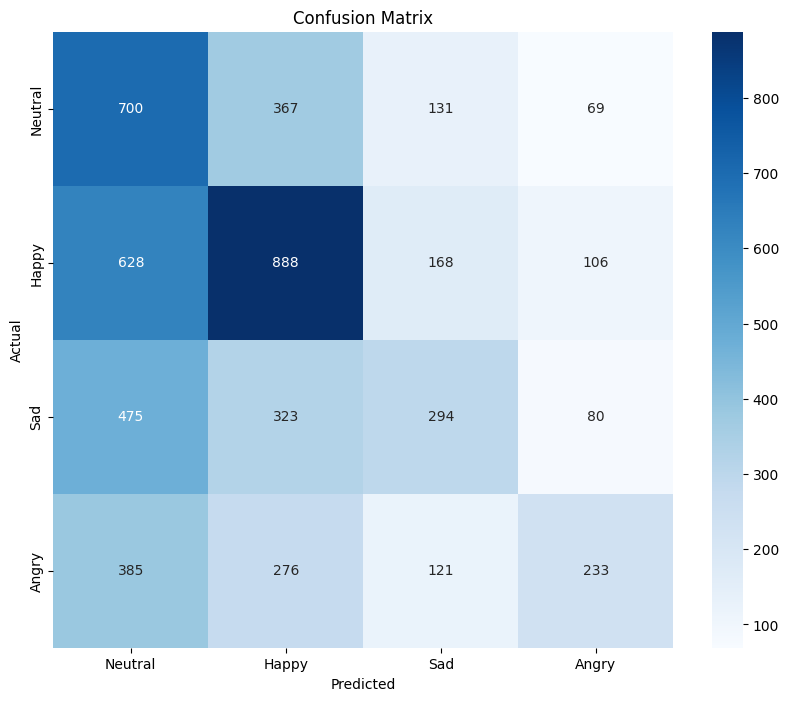


Classification Report:
              precision    recall  f1-score   support

     Neutral       0.32      0.55      0.41      1267
       Happy       0.48      0.50      0.49      1790
         Sad       0.41      0.25      0.31      1172
       Angry       0.48      0.23      0.31      1015

    accuracy                           0.40      5244
   macro avg       0.42      0.38      0.38      5244
weighted avg       0.43      0.40      0.39      5244



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

def load_data():
    """Load and preprocess face emotion data"""
    df = pd.read_csv('face_data_multi.csv')
    X = df.iloc[:, 1:].values / 255.0  # Normalize pixels
    y = df.iloc[:, 0].values
    
    # Apply PCA for dimension reduction
    pca = PCA(n_components=100)
    X_reduced = pca.fit_transform(X)
    print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}")
    
    return train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Main execution for A1
X_train, X_test, y_train, y_test = load_data()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neutral', 'Happy', 'Sad', 'Angry'],
            yticklabels=['Neutral', 'Happy', 'Sad', 'Angry'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['Neutral', 'Happy', 'Sad', 'Angry']))

A2

In [11]:
# New cell
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Calculate regression metrics
y_prob = knn.predict_proba(X_test)
mse = mean_squared_error(y_test, np.argmax(y_prob, axis=1))
rmse = sqrt(mse)
r2 = r2_score(y_test, np.argmax(y_prob, axis=1))
mape = np.mean(np.abs((y_test - np.argmax(y_prob, axis=1)) / y_test)) * 100

print("Regression Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 Score: {r2:.4f}")

Regression Metrics:
MSE: 1.8545
RMSE: 1.3618
MAPE: nan%
R2 Score: -0.6811


C:\Users\saran\AppData\Local\Temp\ipykernel_25456\4076067588.py:10: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - np.argmax(y_prob, axis=1)) / y_test)) * 100
C:\Users\saran\AppData\Local\Temp\ipykernel_25456\4076067588.py:10: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test - np.argmax(y_prob, axis=1)) / y_test)) * 100


A3

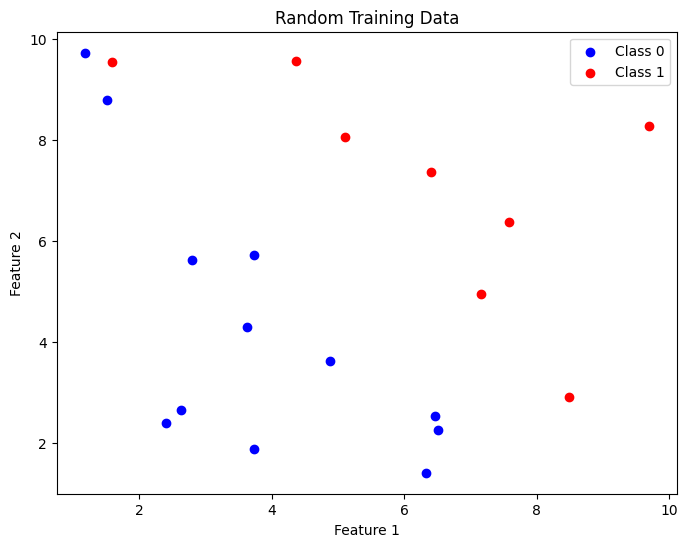

In [12]:
# New cell
# Generate random training data
np.random.seed(42)
X_random = np.random.uniform(1, 10, (20, 2))
y_random = np.where(X_random[:, 0] + X_random[:, 1] > 11, 1, 0)

# Plot training data
plt.figure(figsize=(8, 6))
plt.scatter(X_random[y_random == 0, 0], X_random[y_random == 0, 1], 
           color='blue', label='Class 0')
plt.scatter(X_random[y_random == 1, 0], X_random[y_random == 1, 1], 
           color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Training Data')
plt.legend()
plt.show()

A4

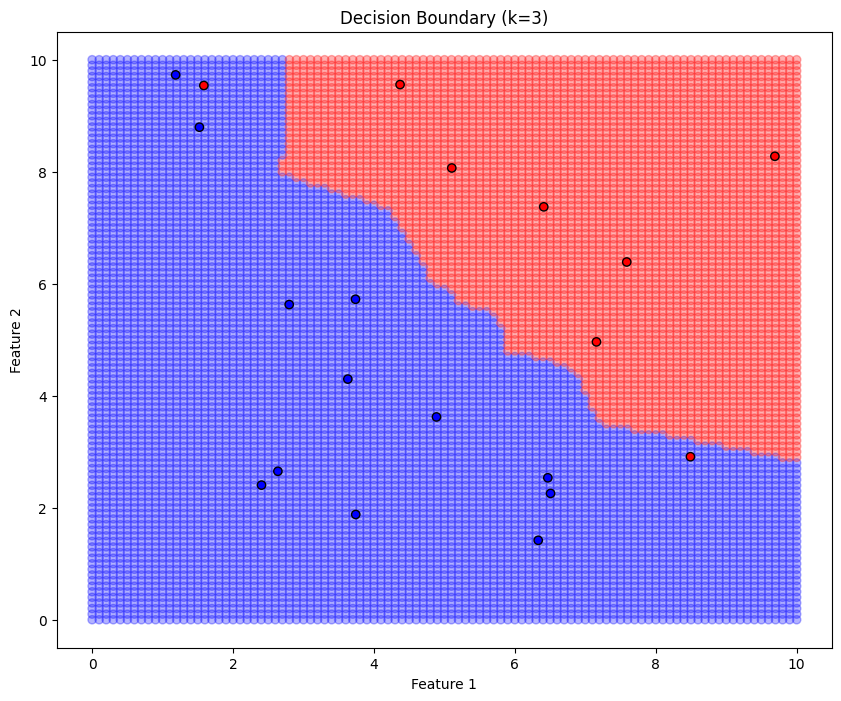

In [13]:
# New cell
# Create test grid
x = np.arange(0, 10.1, 0.1)
y = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x, y)
test_points = np.c_[xx.ravel(), yy.ravel()]

# Train and predict
knn_random = KNeighborsClassifier(n_neighbors=3)
knn_random.fit(X_random, y_random)
grid_pred = knn_random.predict(test_points)

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(test_points[:, 0], test_points[:, 1], 
           c=grid_pred, cmap='bwr', alpha=0.3)
plt.scatter(X_random[:, 0], X_random[:, 1], 
           c=y_random, cmap='bwr', edgecolor='black')
plt.title('Decision Boundary (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

A5

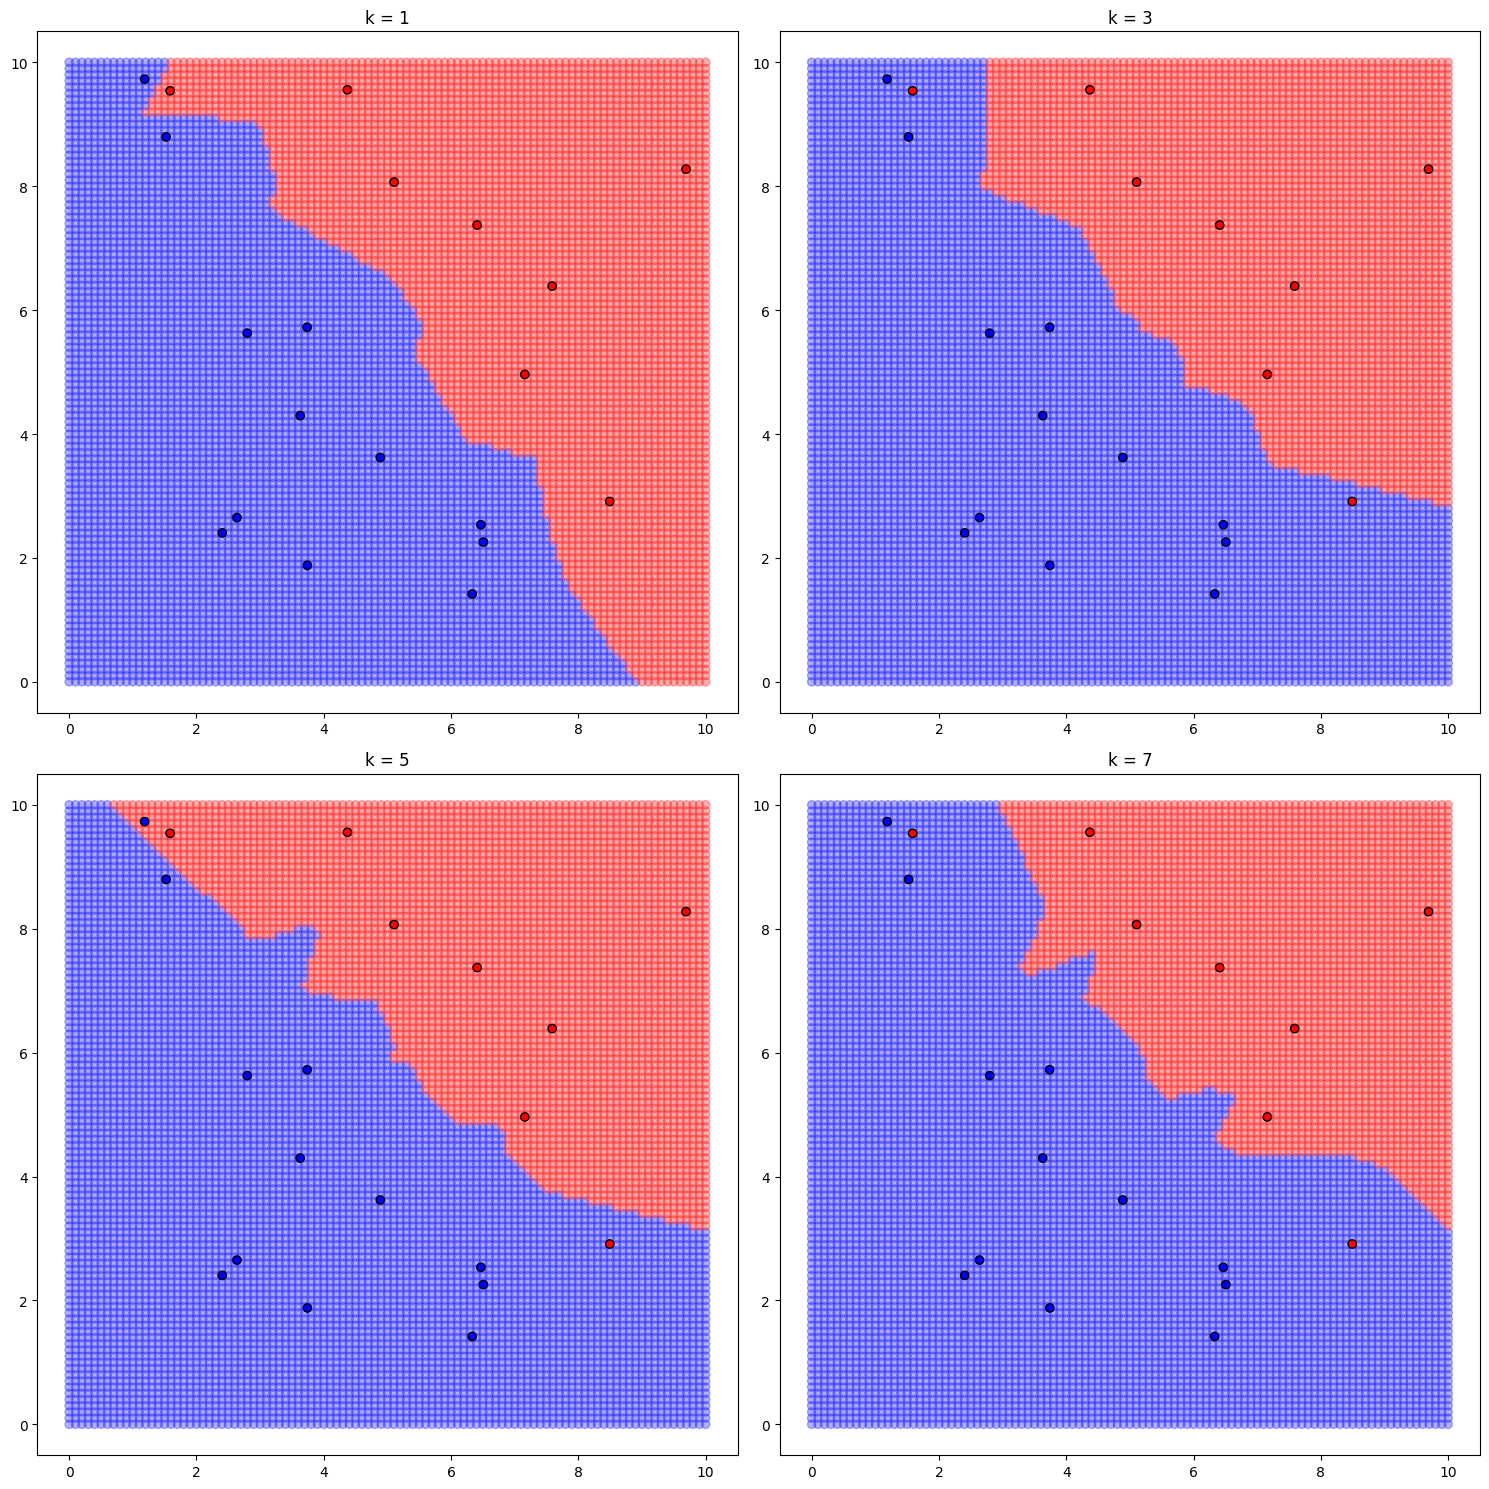

In [14]:
# New cell
k_values = [1, 3, 5, 7]
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_random, y_random)
    grid_pred = knn.predict(test_points)
    
    axes[idx].scatter(test_points[:, 0], test_points[:, 1], 
                     c=grid_pred, cmap='bwr', alpha=0.3)
    axes[idx].scatter(X_random[:, 0], X_random[:, 1], 
                     c=y_random, cmap='bwr', edgecolor='black')
    axes[idx].set_title(f'k = {k}')
    
plt.tight_layout()
plt.show()

A6

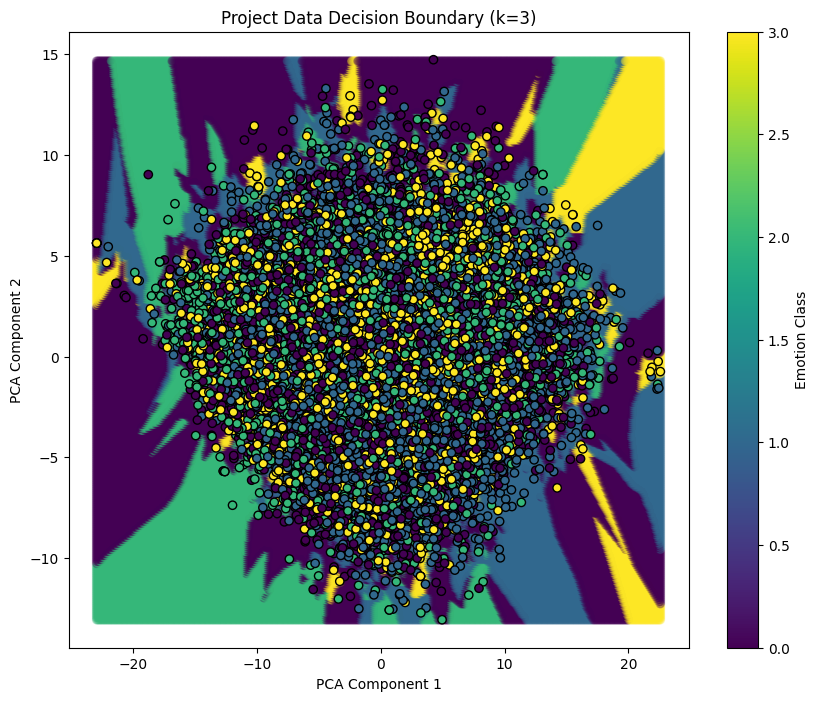

In [15]:
# New cell
# Select two PCA components for visualization
X_pca = X_train[:, :2]
y_pca = y_train

# Create test grid for PCA space
x = np.arange(X_pca[:, 0].min(), X_pca[:, 0].max(), 0.1)
y = np.arange(X_pca[:, 1].min(), X_pca[:, 1].max(), 0.1)
xx, yy = np.meshgrid(x, y)
test_points = np.c_[xx.ravel(), yy.ravel()]

# Train and plot
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y_pca)
grid_pred = knn.predict(test_points)

plt.figure(figsize=(10, 8))
plt.scatter(test_points[:, 0], test_points[:, 1], 
           c=grid_pred, cmap='viridis', alpha=0.3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
           c=y_pca, cmap='viridis', edgecolor='black')
plt.title('Project Data Decision Boundary (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Emotion Class')
plt.show()

A7

In [16]:
# New cell
from sklearn.model_selection import RandomizedSearchCV

# Define parameter space
param_dist = {
    'n_neighbors': np.arange(1, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Random search with cross-validation
random_search = RandomizedSearchCV(
    KNeighborsClassifier(), 
    param_dist, 
    n_iter=10,
    cv=5, 
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Best parameters: {'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}
Best cross-validation score: 0.4380870111851712
